In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas_datareader as pdr

In [10]:
df=pdr.get_data_tiingo('AAPL' , api_key ='457a2ca90be396795200740f4334f925aacb80a1')

c:\Users\mymls\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [11]:
df.to_csv('AAPL.csv')
df = pd.read_csv('AAPL.csv')
df.dropna()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-09-18 00:00:00+00:00,158.67,160.50,157.9950,160.110,27939718,37.644988,38.079162,37.484842,37.986633,111758872,0.0,1.0
1,AAPL,2017-09-19 00:00:00+00:00,158.73,159.77,158.4400,159.510,20347352,37.659223,37.905967,37.590420,37.844281,81389408,0.0,1.0
2,AAPL,2017-09-20 00:00:00+00:00,156.07,158.26,153.8300,157.900,51693239,37.028129,37.547714,36.496682,37.462303,206772956,0.0,1.0
3,AAPL,2017-09-21 00:00:00+00:00,153.39,155.80,152.7500,155.800,36643382,36.392290,36.964071,36.240448,36.964071,146573528,0.0,1.0
4,AAPL,2017-09-22 00:00:00+00:00,151.89,152.27,150.5600,152.020,46114424,36.036410,36.126567,35.720863,36.067253,184457696,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,AAPL,2022-09-08 00:00:00+00:00,154.46,156.36,152.6800,154.640,84923847,154.460000,156.360000,152.680000,154.640000,84923847,0.0,1.0
1253,AAPL,2022-09-09 00:00:00+00:00,157.37,157.82,154.7500,155.470,68081006,157.370000,157.820000,154.750000,155.470000,68081006,0.0,1.0
1254,AAPL,2022-09-12 00:00:00+00:00,163.43,164.26,159.3000,159.590,104955962,163.430000,164.260000,159.300000,159.590000,104955962,0.0,1.0
1255,AAPL,2022-09-13 00:00:00+00:00,153.84,160.54,153.3700,159.900,122656614,153.840000,160.540000,153.370000,159.900000,122656614,0.0,1.0


In [9]:
features=  list(df)[2:6]
features

['close', 'high', 'low', 'open']

In [5]:
df = df[features].astype(float)
df


,close,high,low,open
0,160.86,163.960,158.770,162.610
1,159.65,159.960,157.910,159.870
2,158.28,159.400,158.090,158.990
3,159.88,160.970,158.000,158.470
4,158.67,160.500,157.995,160.110
...,...,...,...,...
1253,155.81,160.362,154.965,159.750
1254,154.53,157.090,153.690,156.470
1255,155.96,156.670,153.610,154.825
1256,154.46,156.360,152.680,154.640


In [6]:
x = 0.8*len(df)
x= int(x)

In [7]:
df_for_training = df.iloc[ 1:x , ]
print(df_for_training.shape)
df_for_testing = df.iloc[x: , ]
print(df_for_testing.shape)

(1005, 4)
(252, 4)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_for_training_scaled=scaler.fit_transform(df_for_training)

In [9]:
trainX = []
trainY_open = []
trainY_high = []
trainY_low = []
trainY_close = []

n_past = 30  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
for i in range(n_past, len(df_for_training_scaled)):
    trainX.append(df_for_training_scaled[i - n_past:i])
    trainY_open.append(df_for_training_scaled[i, 0])
    trainY_high.append(df_for_training_scaled[i, 1])
    trainY_low.append(df_for_training_scaled[i, 2])
    trainY_close.append(df_for_training_scaled[i, 3])

trainX, trainY_open,trainY_high,trainY_low,trainY_close = np.array(trainX), np.array(trainY_open),np.array(trainY_high),np.array(trainY_low),np.array(trainY_close)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY_open shape == {}.'.format(trainY_open.shape))
print('trainY_high shape == {}.'.format(trainY_high.shape))
print('trainY_low shape == {}.'.format(trainY_low.shape))
print('trainY_close shape == {}.'.format(trainY_close.shape))

trainX shape == (975, 30, 4).
trainY_open shape == (975,).
trainY_high shape == (975,).
trainY_low shape == (975,).
trainY_close shape == (975,).


In [10]:
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.layers import LSTM

For Opening Price

In [11]:
model_open = Sequential()
#first layer
model_open.add(LSTM(units=64, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model_open.add(Dropout(0.2))

#second layer
model_open.add(LSTM(units=60,activation='tanh',return_sequences=True))
model_open.add(Dropout(0.3))


#third layer
model_open.add(LSTM(units=80,activation='tanh',return_sequences=True))
model_open.add(Dropout(0.4))



#fourth layer
model_open.add(LSTM(units=100,activation='tanh'))
model_open.add(Dropout(0.5))


#last layer
model_open.add(Dense(units=1))

In [12]:
model_open.compile(optimizer='adam', loss='mse')
model_open.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            17664     
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 60)            30000     
                                                                 
 dropout_1 (Dropout)         (None, 30, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 30, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               7

Epoch 1/100
28/28 [==============================] - 12s 142ms/step - loss: 0.3964 - val_loss: 0.0570
Epoch 2/100
28/28 [==============================] - 2s 58ms/step - loss: 0.2372 - val_loss: 0.0053
Epoch 3/100
28/28 [==============================] - 2s 66ms/step - loss: 0.2026 - val_loss: 0.0264
Epoch 4/100
28/28 [==============================] - 2s 66ms/step - loss: 0.1732 - val_loss: 0.0077
Epoch 5/100
28/28 [==============================] - 2s 75ms/step - loss: 0.1561 - val_loss: 0.0064
Epoch 6/100
28/28 [==============================] - 2s 66ms/step - loss: 0.1243 - val_loss: 0.0153
Epoch 7/100
28/28 [==============================] - 2s 59ms/step - loss: 0.1094 - val_loss: 0.0108
Epoch 8/100
28/28 [==============================] - 2s 59ms/step - loss: 0.1051 - val_loss: 0.0032
Epoch 9/100
28/28 [==============================] - 2s 59ms/step - loss: 0.1204 - val_loss: 0.0029
Epoch 10/100
28/28 [==============================] - 2s 65ms/step - loss: 0.1031 - val_loss: 0.00

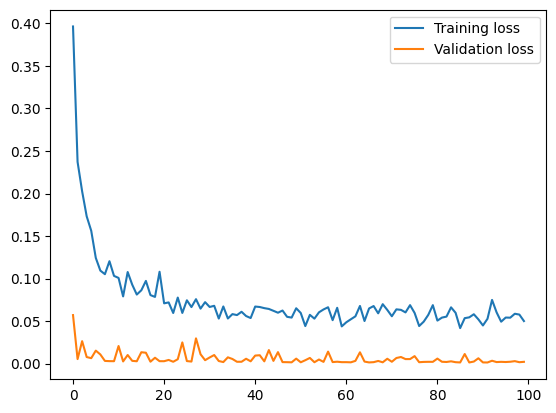

In [13]:
history = model_open.fit(trainX, trainY_open, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

For High

In [14]:
model_high = Sequential()
#first layer
model_high.add(LSTM(units=64, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model_high.add(Dropout(0.2))

#second layer
model_high.add(LSTM(units=60,activation='tanh',return_sequences=True))
model_high.add(Dropout(0.3))


#third layer
model_high.add(LSTM(units=80,activation='tanh',return_sequences=True))
model_high.add(Dropout(0.4))



#fourth layer
model_high.add(LSTM(units=100,activation='tanh'))
model_high.add(Dropout(0.5))


#last layer
model_high.add(Dense(units=1))

In [15]:
model_high.compile(optimizer='adam', loss='mse')
model_high.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 64)            17664     
                                                                 
 dropout_4 (Dropout)         (None, 30, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 30, 60)            30000     
                                                                 
 dropout_5 (Dropout)         (None, 30, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 30, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 30, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 100)              

Epoch 1/100
28/28 [==============================] - 9s 112ms/step - loss: 0.3393 - val_loss: 0.0350
Epoch 2/100
28/28 [==============================] - 2s 60ms/step - loss: 0.2342 - val_loss: 0.0512
Epoch 3/100
28/28 [==============================] - 2s 78ms/step - loss: 0.1856 - val_loss: 0.0268
Epoch 4/100
28/28 [==============================] - 2s 69ms/step - loss: 0.1602 - val_loss: 0.0199
Epoch 5/100
28/28 [==============================] - 2s 71ms/step - loss: 0.1376 - val_loss: 0.0105
Epoch 6/100
28/28 [==============================] - 2s 80ms/step - loss: 0.1169 - val_loss: 0.0031
Epoch 7/100
28/28 [==============================] - 2s 69ms/step - loss: 0.1258 - val_loss: 0.0043
Epoch 8/100
28/28 [==============================] - 2s 63ms/step - loss: 0.1197 - val_loss: 0.0033
Epoch 9/100
28/28 [==============================] - 2s 61ms/step - loss: 0.1285 - val_loss: 0.0040
Epoch 10/100
28/28 [==============================] - 2s 70ms/step - loss: 0.0999 - val_loss: 0.003

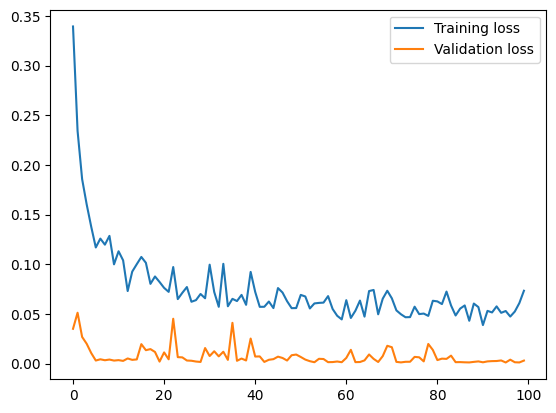

In [16]:
history = model_high.fit(trainX, trainY_high, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

For Low

In [17]:
model_low = Sequential()
#first layer
model_low.add(LSTM(units=64, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model_low.add(Dropout(0.2))

#second layer
model_low.add(LSTM(units=60,activation='tanh',return_sequences=True))
model_low.add(Dropout(0.3))


#third layer
model_low.add(LSTM(units=80,activation='tanh',return_sequences=True))
model_low.add(Dropout(0.4))



#fourth layer
model_low.add(LSTM(units=100,activation='tanh'))
model_low.add(Dropout(0.5))


#last layer
model_low.add(Dense(units=1))

In [18]:
model_low.compile(optimizer='adam', loss='mse')
model_low.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 30, 64)            17664     
                                                                 
 dropout_8 (Dropout)         (None, 30, 64)            0         
                                                                 
 lstm_9 (LSTM)               (None, 30, 60)            30000     
                                                                 
 dropout_9 (Dropout)         (None, 30, 60)            0         
                                                                 
 lstm_10 (LSTM)              (None, 30, 80)            45120     
                                                                 
 dropout_10 (Dropout)        (None, 30, 80)            0         
                                                                 
 lstm_11 (LSTM)              (None, 100)              

Epoch 1/100
28/28 [==============================] - 9s 115ms/step - loss: 0.3978 - val_loss: 0.0106
Epoch 2/100
28/28 [==============================] - 1s 51ms/step - loss: 0.2679 - val_loss: 0.0478
Epoch 3/100
28/28 [==============================] - 2s 54ms/step - loss: 0.2021 - val_loss: 0.0115
Epoch 4/100
28/28 [==============================] - 2s 56ms/step - loss: 0.1969 - val_loss: 0.0066
Epoch 5/100
28/28 [==============================] - 2s 55ms/step - loss: 0.1379 - val_loss: 0.0041
Epoch 6/100
28/28 [==============================] - 2s 54ms/step - loss: 0.1483 - val_loss: 0.0343
Epoch 7/100
28/28 [==============================] - 2s 53ms/step - loss: 0.1277 - val_loss: 0.0064
Epoch 8/100
28/28 [==============================] - 2s 74ms/step - loss: 0.1276 - val_loss: 0.0072
Epoch 9/100
28/28 [==============================] - 2s 76ms/step - loss: 0.0993 - val_loss: 0.0078
Epoch 10/100
28/28 [==============================] - 2s 74ms/step - loss: 0.1193 - val_loss: 0.006

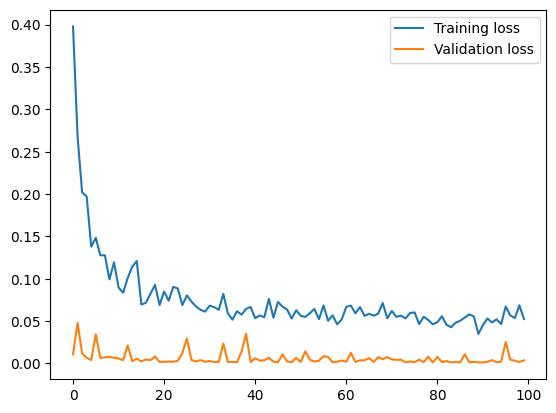

In [19]:
history = model_low.fit(trainX, trainY_low, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

For Close

In [20]:
model_close = Sequential()
#first layer
model_close.add(LSTM(units=64, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model_close.add(Dropout(0.2))

#second layer
model_close.add(LSTM(units=60,activation='tanh',return_sequences=True))
model_close.add(Dropout(0.3))


#third layer
model_close.add(LSTM(units=80,activation='tanh',return_sequences=True))
model_close.add(Dropout(0.4))



#fourth layer
model_close.add(LSTM(units=100,activation='tanh'))
model_close.add(Dropout(0.5))


#last layer
model_close.add(Dense(units=1))

In [21]:
model_close.compile(optimizer='adam', loss='mse')
model_close.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 64)            17664     
                                                                 
 dropout_12 (Dropout)        (None, 30, 64)            0         
                                                                 
 lstm_13 (LSTM)              (None, 30, 60)            30000     
                                                                 
 dropout_13 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_14 (LSTM)              (None, 30, 80)            45120     
                                                                 
 dropout_14 (Dropout)        (None, 30, 80)            0         
                                                                 
 lstm_15 (LSTM)              (None, 100)              

Epoch 1/100
28/28 [==============================] - 10s 105ms/step - loss: 0.3402 - val_loss: 0.0190
Epoch 2/100
28/28 [==============================] - 2s 67ms/step - loss: 0.2280 - val_loss: 0.0048
Epoch 3/100
28/28 [==============================] - 2s 73ms/step - loss: 0.1897 - val_loss: 0.0429
Epoch 4/100
28/28 [==============================] - 2s 76ms/step - loss: 0.1557 - val_loss: 0.0047
Epoch 5/100
28/28 [==============================] - 2s 69ms/step - loss: 0.2051 - val_loss: 0.0345
Epoch 6/100
28/28 [==============================] - 2s 80ms/step - loss: 0.1213 - val_loss: 0.0085
Epoch 7/100
28/28 [==============================] - 2s 69ms/step - loss: 0.1099 - val_loss: 0.0026
Epoch 8/100
28/28 [==============================] - 2s 68ms/step - loss: 0.1194 - val_loss: 0.0092
Epoch 9/100
28/28 [==============================] - 2s 79ms/step - loss: 0.1288 - val_loss: 0.0081
Epoch 10/100
28/28 [==============================] - 2s 76ms/step - loss: 0.1083 - val_loss: 0.00

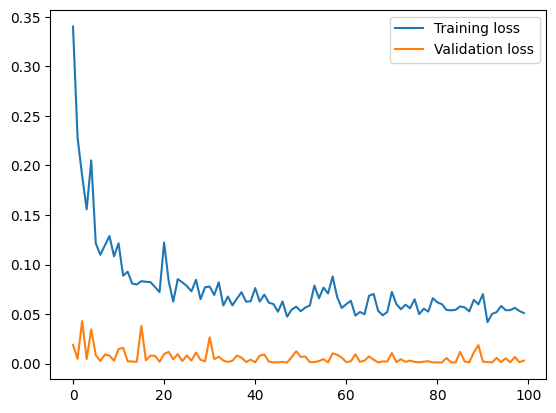

In [22]:
history = model_close.fit(trainX, trainY_close, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# Testing

In [23]:
df_for_testing.head()

,close,high,low,open
1006,148.97,155.48,148.700,155.00
1007,149.55,151.42,148.750,150.63
1008,148.12,151.07,146.910,150.35
1009,149.03,149.44,146.370,148.56
1010,148.79,148.97,147.221,148.44


In [24]:
past_30_days=df_for_training.tail(30)

In [25]:
past_30_days

,close,high,low,open
976,145.64,146.5500,144.580,144.685
977,145.86,146.3300,144.110,144.380
978,145.52,146.9500,145.250,146.360
979,147.36,148.0450,145.180,145.810
980,146.95,147.7900,146.280,147.270
981,147.06,147.8400,146.170,146.980
982,146.14,147.1100,145.630,146.350
983,146.09,146.7000,145.520,146.200
984,145.60,147.7100,145.300,146.440
985,145.86,146.7200,145.530,146.050


In [26]:
final_testing_df=past_30_days.append(df_for_testing,ignore_index=True)

In [27]:
#now scale the testing data

input_data=scaler.fit_transform(final_testing_df)

In [28]:
input_data.shape

(282, 4)

In [29]:
x_test=[]
y_test_open=[]
y_test_high=[]
y_test_low=[]
y_test_close=[]


for i in range(30,input_data.shape[0]):
    x_test.append(input_data[i-30:i])
    y_test_open.append(input_data[i,0])
    y_test_high.append(input_data[i,1])
    y_test_low.append(input_data[i,2])
    y_test_close.append(input_data[i,3])
    

In [30]:
x_test,y_test_open,y_test_high,y_test_low,y_test_close = np.array(x_test),np.array(y_test_open),np.array(y_test_high),np.array(y_test_low),np.array(y_test_close)
print(x_test.shape)
print(y_test_open.shape)

(252, 30, 4)
(252,)


For Open

In [31]:
y_pred_open=model_open.predict(x_test)

8/8 [==============================] - 2s 33ms/step


In [32]:
type(y_pred_open)

numpy.ndarray

In [33]:
y_pred_open.shape

(252, 1)

In [34]:
prediction_copies_open = np.repeat(y_pred_open, df_for_training.shape[1], axis=-1)
y_pred_open = scaler.inverse_transform(prediction_copies_open)[:,0]

In [35]:
y_test_open=y_test_open.reshape(-1,1)
testing_copies_open=np.repeat(y_test_open,df_for_training.shape[1],axis=-1)
y_test_open=scaler.inverse_transform(testing_copies_open)[:,0]

In [36]:
print(y_pred_open)

[155.67    154.58438 152.54605 150.65717 149.44608 148.89136 148.62161
 147.96388 147.07866 146.43675 146.24287 146.36563 146.49934 146.25174
 145.71124 145.10725 144.55748 144.02463 143.616   143.35742 143.37833
 143.57921 143.82683 143.9758  143.88023 143.78397 143.8666  144.15927
 144.77148 145.6854  146.74811 147.75813 148.43845 148.84982 149.01678
 149.36993 149.5389  149.49277 149.48248 149.75018 150.27937 150.88971
 151.32697 151.4725  151.08032 150.32277 149.71219 149.58736 149.8583
 150.60356 152.0472  154.3671  157.63307 160.6384  161.90543 159.92155
 157.73677 157.6331  159.6521  161.50072 162.31216 163.12077 165.2498
 168.93852 172.98912 176.13127 177.18968 173.50795 171.77324 171.68854
 170.70767 169.17151 169.06328 170.55984 173.21371 176.55493 179.4486
 180.23189 178.68773 176.25618 176.15518 177.65405 177.57733 174.19731
 171.47679 169.96228 170.21947 171.96825 173.80003 174.13596 172.41295
 169.18248 165.88974 163.18593 160.7149  159.00006 158.41074 158.67517
 160.4606

In [37]:
print(y_test_open)

[148.97 149.55 148.12 149.03 148.79 146.06 142.94 143.43 145.85 146.83
 146.92 145.37 141.91 142.83 141.5  142.65 139.14 141.11 142.   143.29
 142.9  142.81 141.51 140.91 143.76 144.84 146.55 148.76 149.26 149.48
 148.69 148.64 149.32 148.85 152.57 149.8  148.96 150.02 151.49 150.96
 151.28 150.44 150.81 147.92 147.87 149.99 150.   151.   153.49 157.87
 160.55 161.02 161.41 161.94 156.81 160.24 165.3  164.77 163.76 161.84
 165.32 171.18 175.08 174.56 179.45 175.74 174.33 179.3  172.26 171.14
 169.75 172.99 175.64 176.28 180.33 179.29 179.38 178.2  177.57 182.01
 179.7  174.92 172.   172.17 172.19 175.08 175.53 172.19 173.07 169.8
 166.23 164.51 162.41 161.62 159.78 159.69 159.22 170.33 174.78 174.61
 175.84 172.9  172.39 171.66 174.83 176.28 172.12 168.64 168.88 172.79
 172.55 168.88 167.3  164.32 160.07 162.74 164.85 165.12 163.2  166.56
 166.23 163.17 159.3  157.44 162.95 158.52 154.73 150.62 155.09 159.59
 160.62 163.98 165.38 168.82 170.21 174.07 174.72 175.6  178.96 177.77
 174.61

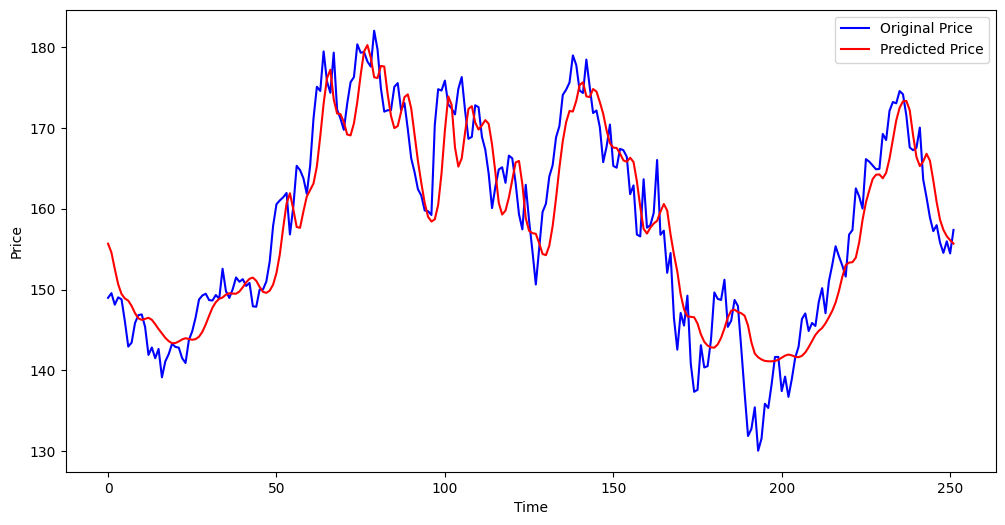

In [38]:
plt.figure(figsize=(12,6))
plt.plot(y_test_open,'b',label='Original Price')
plt.plot(y_pred_open,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [39]:
correct=0
for i in range(1,y_test_open.shape[0]+1):
    if((abs(y_pred_open[i-1]-y_test_open[i-1])/y_test_open[i-1])<=0.1):
        correct+=1

print(correct)

251


In [40]:
error=0
for i in range(1,len(y_pred_open)):
    error+=abs(y_pred_open[i-1]-y_test_open[i-1])

mean=error/y_pred_open
mean

array([5.9532123, 5.995021 , 6.0751266, 6.151294 , 6.2011437, 6.224247 ,
       6.2355437, 6.2632623, 6.3009586, 6.328579 , 6.336969 , 6.331654 ,
       6.3258753, 6.336585 , 6.36009  , 6.386563 , 6.410852 , 6.4345703,
       6.4528785, 6.4645176, 6.463575 , 6.4545317, 6.4434195, 6.4367523,
       6.4410276, 6.44534  , 6.4416385, 6.4285603, 6.4013753, 6.361218 ,
       6.3151517, 6.2719836, 6.243238 , 6.2259836, 6.219008 , 6.2043047,
       6.1972947, 6.199207 , 6.199633 , 6.1885505, 6.1667585, 6.141814 ,
       6.124068 , 6.1181836, 6.134065 , 6.164978 , 6.190121 , 6.1952868,
       6.1840854, 6.153484 , 6.0950584, 6.0034595, 5.8790746, 5.769085 ,
       5.7239375, 5.794945 , 5.8752093, 5.879073 , 5.804725 , 5.7382812,
       5.7095942, 5.681291 , 5.6080947, 5.485644 , 5.357196 , 5.2616243,
       5.230195 , 5.3411765, 5.3951163, 5.3977776, 5.428793 , 5.478089 ,
       5.481596 , 5.433498 , 5.3502493, 5.2489986, 5.1643567, 5.1419125,
       5.186347 , 5.2578955, 5.26091  , 5.2165236, 

In [41]:
import math 
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_test_open,y_pred_open))
rmse

4.607511451663245

In [42]:
nrmse=rmse/(y_test_high.max()-y_test_high.min())
nrmse

1.1254200922649926

For High

In [43]:
y_pred_high=model_high.predict(x_test)

8/8 [==============================] - 2s 42ms/step


In [44]:
prediction_copies_high = np.repeat(y_pred_high, df_for_training.shape[1], axis=-1)
y_pred_high = scaler.inverse_transform(prediction_copies_high)[:,0]

In [45]:
y_test_high=y_test_high.reshape(-1,1)
testing_copies_high=np.repeat(y_test_high,df_for_training.shape[1],axis=-1)
y_test_high=scaler.inverse_transform(testing_copies_high)[:,0]

In [46]:
print(y_pred_high)

[154.94562 154.16835 152.46875 150.68504 149.32655 148.53654 148.0304
 147.07875 146.00194 145.28015 145.08728 145.2296  145.36505 145.08702
 144.52307 143.90805 143.29724 142.67932 142.18906 141.85588 141.89737
 142.17006 142.49075 142.6904  142.59097 142.49759 142.60773 142.92868
 143.59741 144.58438 145.70514 146.76302 147.48465 147.95697 148.19048
 148.5732  148.69455 148.61832 148.60434 148.88333 149.4276  150.03622
 150.46536 150.60594 150.22838 149.51225 148.91023 148.77533 149.00858
 149.69359 151.03706 153.20221 156.24942 159.22227 161.01538 160.2861
 159.01271 158.97894 160.6306  162.06659 162.73744 163.51208 165.37799
 168.52875 172.2007  175.49385 177.60558 176.66144 175.54727 174.88878
 173.46837 171.41743 170.31279 170.59013 172.09415 174.56812 177.3688
 179.43515 180.10922 179.46765 179.21391 179.75879 179.48718 177.08705
 174.44028 172.22603 171.30695 171.8226  172.92072 173.55458 173.06744
 171.30635 168.8604  166.26172 163.39714 160.99934 159.65863 159.28558
 160.3740

In [47]:
print(y_test_high)

[153.73967175 149.7195364  149.37297301 147.75897779 147.29359266
 147.1450655  143.20414464 142.96650118 144.77853262 145.42215035
 145.80842    144.3131475  143.11502834 142.81797401 142.74668097
 141.3029969  140.5999683  140.62967374 140.54055744 142.58528145
 142.54874376 143.17443921 141.62975667 139.7979216  142.25357077
 143.25860461 145.18450688 147.49162889 148.06979564 147.95701401
 148.49171182 147.68966511 149.14523136 148.04613031 151.44740246
 148.25406835 148.01642488 149.86806357 150.26413602 150.71961933
 150.49187768 149.86806357 149.72745785 148.44220276 147.74907598
 148.70955166 150.17501972 149.78686872 153.26438481 156.89834951
 159.22527514 163.85932278 159.99761641 160.33427799 158.6608719
 159.39360593 163.68109018 168.41415592 162.3740511  163.12658875
 166.0178186  169.68158775 174.01858105 174.80082414 177.65254576
 180.12799855 175.78110344 177.52382221 179.14771925 171.55303007
 168.69140663 171.28568117 173.91956294 174.89974323 178.43478884
 179.335853

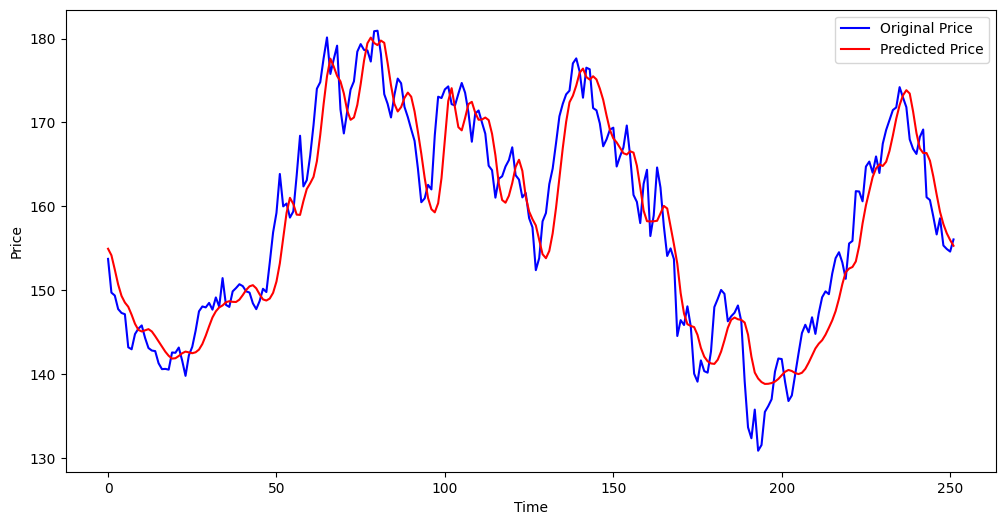

In [48]:
plt.figure(figsize=(12,6))
plt.plot(y_test_high,'b',label='Original Price')
plt.plot(y_pred_high,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [49]:
correct=0
for i in range(1,y_test_high.shape[0]+1):
    if((abs(y_pred_high[i-1]-y_test_high[i-1])/y_test_high[i-1])<=0.1):
        correct+=1

print(correct)

252


In [50]:
import math 
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_test_high,y_pred_high))
rmse

4.008066347888638

For Low

In [51]:
y_pred_low=model_low.predict(x_test)

8/8 [==============================] - 2s 27ms/step


In [52]:
prediction_copies_low = np.repeat(y_pred_low, df_for_training.shape[1], axis=-1)
y_pred_low = scaler.inverse_transform(prediction_copies_low)[:,0]

In [53]:
y_test_low=y_test_low.reshape(-1,1)
testing_copies_low=np.repeat(y_test_low,df_for_training.shape[1],axis=-1)
y_test_low=scaler.inverse_transform(testing_copies_low)[:,0]

In [54]:
print(y_pred_low)

[155.49606 154.51257 152.49274 150.52083 149.12756 148.36113 147.88176
 146.98547 145.93279 145.21515 145.00056 145.11699 145.2437  144.98897
 144.46875 143.89801 143.35016 142.78871 142.3639  142.0992  142.15213
 142.39398 142.68126 142.85915 142.77115 142.69502 142.80705 143.12817
 143.78314 144.7506  145.86568 146.92577 147.64494 148.1048  148.31247
 148.72049 148.8619  148.77228 148.75299 149.04898 149.61758 150.25179
 150.6876  150.8273  150.42432 149.66083 149.04526 148.9185  149.17049
 149.91386 151.39291 153.78624 157.16302 160.28973 161.83546 160.49802
 158.91922 159.01894 160.9276  162.58006 163.26811 163.92557 165.70265
 168.88182 172.62093 175.9583  177.92627 176.39922 175.37343 175.03247
 173.44089 171.3771  170.74377 171.56125 173.3829  175.87267 178.32521
 179.67722 179.57678 178.4603  178.43874 179.38257 178.65178 175.22191
 172.67618 171.253   171.31429 172.60823 173.92511 174.16788 172.97775
 170.55566 167.70474 164.92194 161.98228 159.58858 158.30872 157.98256
 159.2

In [55]:
print(y_test_low)

[150.57466566 150.6250623  148.77046595 148.22618224 149.08393305
 147.61134324 143.08572498 144.6077035  145.53510247 147.4903913
 147.40975668 145.65595361 143.50905676 143.85175391 143.09580431
 140.90869093 140.06192659 141.16057334 140.16271987 144.54722754
 144.38595829 143.63000869 142.85400123 140.99930409 143.32762885
 145.34349445 144.99071797 148.40761015 149.99006464 149.73808144
 150.51418969 149.48720697 150.88722562 150.36299977 151.60275711
 148.26932177 149.66752614 150.52426902 151.70355039 152.53005529
 151.94545426 152.04624754 151.94555506 149.71792278 149.54758214
 149.34498765 151.3104566  151.21974265 152.88283176 154.95917333
 158.46960167 162.97223906 161.01695023 161.60145046 158.29543088
 160.74480837 161.88367164 166.53024183 159.74685411 161.68208508
 166.27825863 170.37046579 172.74918719 175.99473079 176.77083904
 177.61750259 174.27116571 174.37276534 172.79958383 171.73117506
 169.48348493 171.15665337 174.21068974 177.35544007 179.1697191
 180.6413009

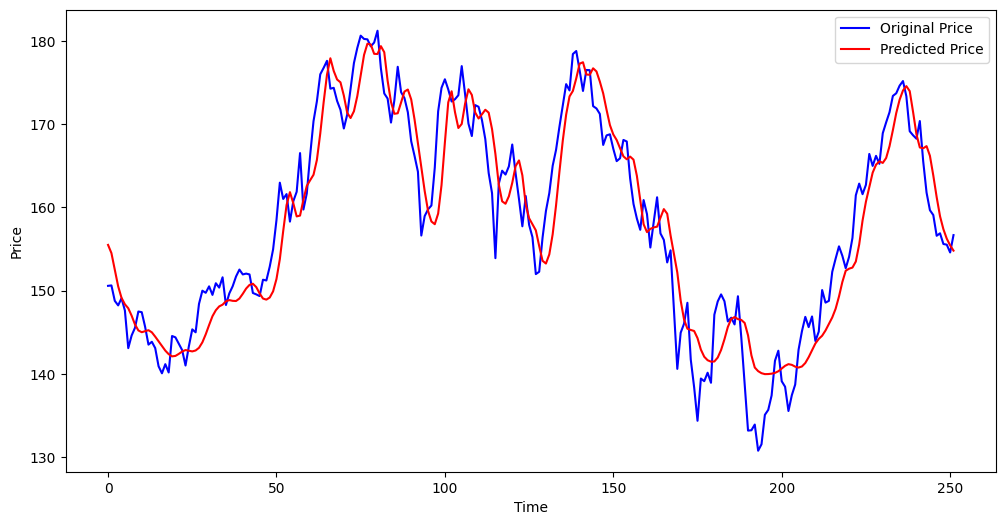

In [56]:
plt.figure(figsize=(12,6))
plt.plot(y_test_low,'b',label='Original Price')
plt.plot(y_pred_low,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [57]:
correct=0
for i in range(1,y_test_low.shape[0]+1):
    if((abs(y_pred_low[i-1]-y_test_low[i-1])/y_test_low[i-1])<=0.10):
        correct+=1

print(correct)

252


In [58]:
error=0
for i in range(1 , len(y_pred_low)):
    error+=abs(y_pred_low[i-1]-y_test_low[i-1])

mean=error/ len(y_pred_low)
mean 

3.4378404078184404

For Close

In [59]:
y_pred_close=model_close.predict(x_test)

8/8 [==============================] - 2s 24ms/step


In [60]:
prediction_copies_close = np.repeat(y_pred_close, df_for_training.shape[1], axis=-1)
y_pred_close = scaler.inverse_transform(prediction_copies_close)[:,0]

In [61]:
y_test_close=y_test_close.reshape(-1,1)
testing_copies_close=np.repeat(y_test_close,df_for_training.shape[1],axis=-1)
y_test_close=scaler.inverse_transform(testing_copies_close)[:,0]

In [62]:
print(y_pred_close)

[154.63452 153.86963 152.23242 150.60097 149.41745 148.74797 148.319
 147.47961 146.5055  145.84906 145.66202 145.7651  145.84999 145.55417
 145.0141  144.45456 143.93518 143.40862 142.97075 142.66103 142.64494
 142.82997 143.05853 143.1883  143.0741  142.96263 143.03137 143.30145
 143.88649 144.75757 145.73837 146.63759 147.2181  147.5922  147.79158
 148.19958 148.38675 148.37296 148.41182 148.73022 149.28976 149.89996
 150.31175 150.43306 150.07707 149.4321  148.93468 148.87749 149.14891
 149.83536 151.17935 153.36111 156.46565 159.3806  160.93117 159.91202
 158.68365 159.01456 161.23517 162.80118 163.25414 163.99554 166.31215
 170.23901 174.34239 177.54147 179.19914 177.28545 176.6067  176.55035
 174.73433 172.31442 171.72508 173.00372 175.45042 178.47307 180.96762
 181.80444 181.34541 180.32504 180.78687 182.06769 181.15417 177.42355
 174.91995 173.41982 173.56865 175.1572  176.41798 176.09259 174.44795
 171.94974 169.36606 166.93437 164.23454 162.0282  160.96959 160.81659
 162.324

In [63]:
print(y_test_close)

[155.17681551 150.83602825 150.5579     148.77986586 148.66066804
 149.0381278  144.05168568 144.18081665 144.69734054 146.8826339
 145.89925189 145.710522   143.50536234 142.73057651 143.91262156
 142.16438687 142.02532275 139.77049733 139.75063102 143.31663246
 144.28014817 142.53191348 143.48549604 141.50383229 142.37298306
 144.02188623 143.6990588  147.24022736 148.91892998 149.02819465
 149.90231199 148.89906368 149.54471853 149.57451799 150.03144296
 147.44385696 149.2020248  148.87919738 150.59763261 151.77967765
 152.08760535 151.61081407 150.40890273 150.230106   149.17719192
 148.65073489 150.5777663  150.15064078 151.19858828 153.89543895
 157.80910069 161.8121608  161.25590431 160.8883777  159.71129923
 159.51760277 160.1284916  167.57338875 158.88684765 164.13651828
 164.40471338 169.16269301 172.18733768 174.95372041 175.24674839
 181.117241   175.29144757 175.15238345 179.29450768 170.0070109
 168.36804088 171.62114804 173.09622106 175.88743667 177.11418089
 180.1686250

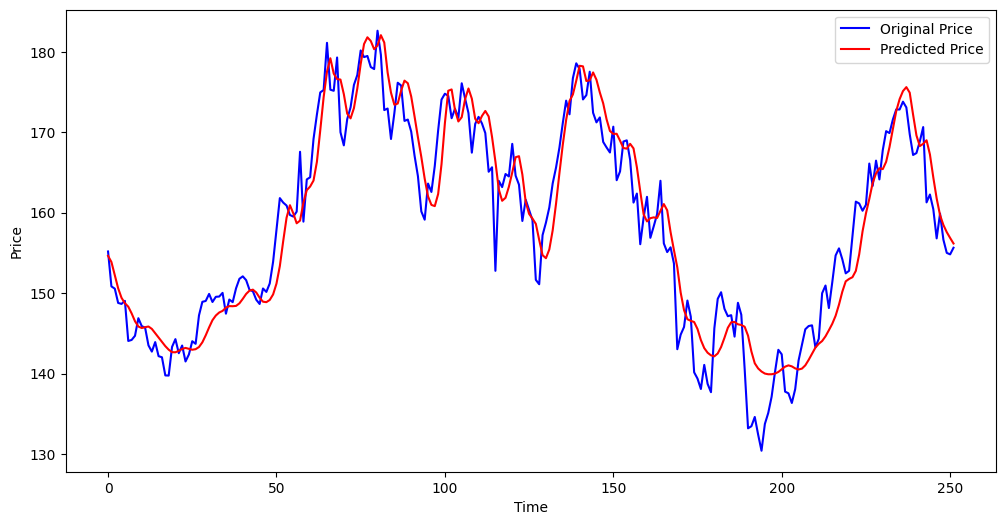

In [64]:
plt.figure(figsize=(12,6))
plt.plot(y_test_close,'b',label='Original Price')
plt.plot(y_pred_close,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [65]:
correct=0
for i in range(1,y_test_close.shape[0]+1):
    if((abs(y_pred_close[i-1]-y_test_close[i-1])/y_test_close[i-1])<=0.1):
        correct+=1

print(correct)

252


In [66]:
error=0
for i in range(1,len(y_pred_close)):
    error+=abs(y_pred_close[i-1]-y_test_close[i-1])

mean=error/len(y_pred_close)
mean

3.160384193824957

# Forecasting

In [67]:
past_30=df_for_testing.tail(30)

In [68]:
past_30

,close,high,low,open
1228,162.51,163.630,159.5000,161.240
1229,161.51,163.590,160.8900,161.010
1230,160.01,162.410,159.6300,160.100
1231,166.13,166.590,160.7500,160.840
1232,165.81,167.190,164.4300,166.005
1233,165.35,165.850,163.0000,163.210
1234,164.87,167.810,164.2000,166.370
1235,164.92,165.820,163.2500,164.020
1236,169.24,169.340,166.9000,167.680
1237,168.49,170.990,168.1900,170.060


In [69]:
input=scaler.fit_transform(past_30)

In [70]:
output=[]
forecast_open=[]
forecast_high=[]
forecast_low=[]
forecast_close=[]

i=0

while(i<10):
    x_input=[]
    x_input.append(input_data[i:i+30]) 
            
    x_input=np.array(x_input)
    forecast_open.append(model_open.predict(x_input)[0][0])
    forecast_high.append(model_high.predict(x_input)[0][0])
    forecast_low.append(model_low.predict(x_input)[0][0])
    forecast_close.append(model_close.predict(x_input)[0][0])
    
    
    temp=[forecast_open[i],forecast_high[i],forecast_low[i],forecast_close[i]]
    temp=np.array(temp)
    np.vstack([input,temp])
    i+=1

1/1 [==============================] - 0s 32ms/step


In [71]:
forecast_close=np.array(forecast_close)

In [72]:
forecast_close=forecast_close.reshape((10,1))

In [73]:
forecast_close.shape

(10, 1)

In [74]:
forecast_copies = np.repeat(forecast_close, df_for_training.shape[1], axis=-1)
forecast_close = scaler.inverse_transform(forecast_copies)[:,0]

In [75]:
forecast_close

array([163.22475, 162.84251, 162.02437, 161.20909, 160.61766, 160.2831 ,
       160.06873, 159.64928, 159.16248, 158.83444], dtype=float32)

In [76]:
forecast_open=np.array(forecast_open)

In [77]:
forecast_open=forecast_open.reshape((10,1))

In [78]:
forecast_copies = np.repeat(forecast_open, df_for_training.shape[1], axis=-1)
forecast_open = scaler.inverse_transform(forecast_copies)[:,0]

In [79]:
forecast_open

array([163.7422 , 163.19969, 162.18109, 161.23717, 160.63196, 160.35475,
       160.21996, 159.89127, 159.4489 , 159.12813], dtype=float32)